<a href="https://colab.research.google.com/github/rohith033/AI-research/blob/main/testapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 22.0 MB/s 
     |████████████████████████████████| 1.3 MB 57.4 MB/s 
     |████████████████████████████████| 451 kB 53.0 MB/s 
     |████████████████████████████████| 5.5 MB 62.4 MB/s 
     |████████████████████████████████| 1.6 MB 47.9 MB/s 
     |████████████████████████████████| 212 kB 71.3 MB/s 
     |████████████████████████████████| 182 kB 69.4 MB/s 
     |████████████████████████████████| 115 kB 56.5 MB/s 
     |████████████████████████████████| 127 kB 59.1 MB/s 
     |████████████████████████████████| 7.6 MB 59.3 MB/s 


i) collect data from web <br>
ii) split data and make datasets<br>
iii) train <br>
iv) predict

In [ ]:
import fastbook

In [ ]:
from fastbook import *

In [ ]:
!pip install duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 96 kB 5.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
from fastai.vision.widgets import *

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'bear'
100


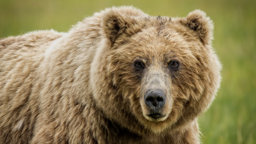

In [ ]:
from fastdownload import download_url
tmp = search_images('bear')
print(len(tmp))
download_url(tmp[0],"./test")
img = Image.open("./test")
img.to_thumb(256)

In [24]:
path = Path("typesofbears")
search = "black bear","brown bear","panda","grizzly bear"
from time import sleep
for i in search:
  dest = path/i
  dest.mkdir(exist_ok=True,parents=True)
  download_images(dest,urls=search_images(i),max_pics=100)
  sleep(2)
  resize_images(path/i,max_size=256,dest=path/i)



Searching for 'black bear'
Searching for 'brown bear'
Searching for 'panda'
Searching for 'grizzly bear'


In [25]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

In [ ]:
datablock = DataBlock(blocks = (ImageBlock,CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct=0.2,seed=42),
                  get_y = parent_label,
                  item_tfms=RandomResizedCrop(224,min_scale=0.5),
                  batch_tfms=aug_transforms(mult=2))
BearBlock = datablock.dataloaders(path)
BearBlock.show_batch(max_n=12)

In [27]:
learn = cnn_learner(BearBlock,resnet18,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.182163,0.745629,0.774194,01:51


epoch,train_loss,valid_loss,accuracy,time
0,0.994692,0.647603,0.780645,02:34
1,0.924110,0.683979,0.761290,02:45
2,0.846745,0.652459,0.754839,02:31
3,0.782107,0.660240,0.761290,02:30


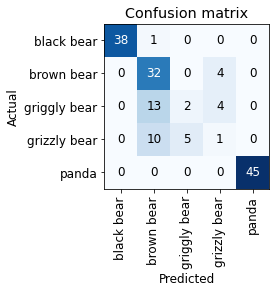

In [28]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

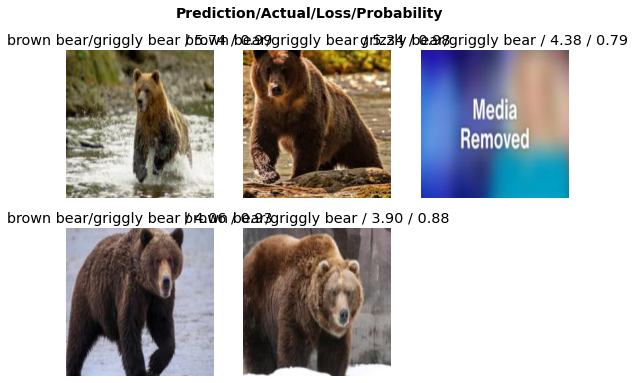

In [30]:
inter.plot_top_losses(5)

In [31]:
label,_,prob=learn.predict('./test')

Searching for 'randombears'


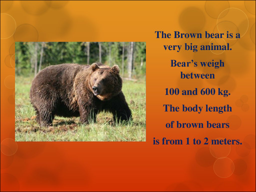

In [32]:
testlist = search_images("randombears")
download_url(testlist[79],dest="./test1")
img = Image.open("./test1")
img.to_thumb(256)

In [34]:
from torch import double
label,_,prob=learn.predict('./test1')
print(label)
print(prob)
print(float(prob[1]))

grizzly bear
TensorBase([4.5156e-04, 1.9013e-01, 6.5087e-02, 7.4405e-01, 2.8172e-04])
0.19013318419456482
